# DPCM Card Game Simulator

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import ast

### Variables

In [2]:
purple = '#7f00ff'
orange = '#ff4500'

### Analysis

In [ ]:
results_df = pd.read_csv('../data/results.csv')

In [ ]:
fig = plt.figure(1, figsize=(15, 7))

n, bins, patches = plt.hist(results_df['Turns'], bins=np.arange(0, max(results_df['Turns']), 5), color=purple, edgecolor='w')

x = range(max(results_df['Turns']))
plt.xticks(np.arange(min(x), max(x)+10, 5))

n = list(n)
patches[n.index(max(n))].set_fc(orange)

plt.xlabel('Turns per Game')
plt.ylabel('Number of games')

plt.title('Turns Distribution')

plt.show()

In [ ]:
fig = plt.figure(1, figsize=(15, 7))

not_fair_file = 'not_fair.csv'
fair_file = 'fair.csv'

not_fair_df = pd.read_csv('../data/' + not_fair_file)
fair_df = pd.read_csv('../data/' + fair_file)

plt.plot(not_fair_df.index, not_fair_df['Rate'], color = orange, label='Win-Rate not fair')
plt.plot(fair_df.index, fair_df['Rate'], color = purple, label='Win-Rate fair')

plt.hlines(0.5, 0, len(not_fair_df), colors='black', linestyles='dashed')

plt.title('Win Rate with Starting Advantage')

plt.legend(loc='lower right')

plt.xlabel('Simulations')
plt.ylabel('Win Rate')

plt.show()

In [ ]:
print(f'{abs(not_fair_df['Rate'].iloc[-1] - fair_df['Rate'].iloc[-1])*100:.2f}%')

### Human VS AI

In [ ]:
fig = plt.figure(1, figsize=(15, 7))

fair_file = 'fair.csv'
fair_df = pd.read_csv('../data/' + fair_file)

plt.plot(results_df.index, results_df['Rate'], color = orange, label='AI')
plt.plot(fair_df.index, fair_df['Rate'], color = purple, label='Human')

plt.hlines(0.5, 0, len(not_fair_df), colors='black', linestyles='dashed')

plt.title('Win Rate with Starting Advantage')

plt.legend(loc='lower right')

plt.xlabel('Simulations')
plt.ylabel('Win Rate')

plt.show()

In [ ]:
print(f'{abs(results_df['Rate'].iloc[-1] - fair_df['Rate'].iloc[-1])*100:.2f}%')

### Visits

In [ ]:
visited_df = pd.read_csv('../data/visited.csv')

In [ ]:
visited_df['MAX'] = visited_df.iloc[:, 1:].max(axis=1)
visited_df['HAND'] = visited_df['ID'].apply(lambda x: sum(eval(x)[3:]))

In [ ]:
visited_pivot = visited_df.drop(columns='MAX').iloc[:, 1:].groupby('HAND').sum()
visited_pivot = visited_pivot.replace(0, np.NaN)

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

cmap_custom = LinearSegmentedColormap.from_list('custom', [purple, orange])

sns.heatmap(visited_pivot, 
            fmt='.0f', 
            linewidth = 0.3, 
            annot = True,
            cbar = True,
            cmap=cmap_custom,
            square=True)

ax.title.set_text('Visits')

ax.set(xlabel='Move taken', ylabel='Hand Cards Playable')

plt.show()

### Exploration

In [ ]:
visits_df = pd.read_csv('../data/visits.csv')

In [ ]:
visits_df.head()

In [ ]:
visits_df['Cumsum'] = visits_df['Visits'].cumsum()

In [ ]:
visits_df.head()

In [ ]:
fig = plt.figure(1, figsize=(10, 10))

x = np.linspace(0, max(visits_df.index))
y = x

plt.plot(visits_df.index, visits_df['Cumsum'], color = orange, label='Coverage')
plt.plot(x, y, color = 'black', label='Linear', linestyle='--')

plt.title('State/Move Coverage')

plt.legend(loc='lower right')

plt.xlabel('Turns of games')
plt.ylabel('State/Move Pairs Visited')

plt.show()

### Cards Playable

In [ ]:
visited_df = pd.read_csv('../data/visited.csv')

In [ ]:
visited_df.head()

In [ ]:
visited_df['VISITS'] = visited_df.iloc[:, 1:].max(axis=1)

In [ ]:
visited_filtered_df = visited_df[visited_df['VISITS'] > 0]

In [ ]:
visited_filtered_df.reset_index(drop=True, inplace=True)

In [ ]:
visited_filtered_df.head()

In [ ]:
print(len(visited_df), len(visited_filtered_df), str(round(len(visited_filtered_df)*100/len(visited_df), 2)) + '%')

In [ ]:
state_max_df = visited_filtered_df[['ID', 'VISITS']].copy()

In [ ]:
state_max_df.head()

In [ ]:
state_max_df['ID'] = state_max_df['ID'].apply(ast.literal_eval)

In [ ]:
state_max_df.head()

In [ ]:
state_max_df['HAND'] = state_max_df['ID'].apply(lambda x: x[3:])

In [ ]:
state_max_df.head()

In [ ]:
state_max_df['HAND'] = state_max_df['HAND'].apply(lambda x: sum(x))

In [ ]:
state_max_df.head()

In [ ]:
state_max_df = state_max_df.drop('ID', axis=1)

In [ ]:
state_max_df.head()

In [ ]:
state_max_df = pd.DataFrame(state_max_df.groupby('HAND')['VISITS'].sum())

In [ ]:
state_max_df.reset_index(drop=False, inplace=True)

In [ ]:
state_max_df.head()

In [ ]:
state_max_df['PERCENTAGE'] = round((state_max_df['VISITS'] / state_max_df['VISITS'].sum())*100, 2)

In [ ]:
state_max_df.head()

In [ ]:
state_max_df = state_max_df.drop('VISITS', axis=1)

In [ ]:
state_max_df.head()

In [ ]:
fig = plt.figure(1, figsize=(15, 7))

barra_piu_alta = state_max_df.loc[state_max_df['PERCENTAGE'].idxmax()]

plt.bar(state_max_df['HAND'], state_max_df['PERCENTAGE'], color=purple, edgecolor='w')
plt.bar(barra_piu_alta['HAND'], barra_piu_alta['PERCENTAGE'], color=orange)

plt.xticks(state_max_df['HAND'])

plt.xlabel('Cards in hand')
plt.ylabel('Occurences %')

plt.title('Quantity of playable Cards')

plt.show()

#### Q-Values

In [ ]:
q_df = pd.read_csv('../data/q.csv')

In [ ]:
q_df['MAX'] = q_df.iloc[:, 1:].max(axis=1)

In [ ]:
q_df['HAND'] = q_df['ID'].apply(lambda x: sum(eval(x)[3:]))

In [ ]:
q_curve = q_df.copy()

In [ ]:
q_curve[['HAND', 'MAX']] = q_curve[['HAND', 'MAX']].replace(0, np.NaN)

q_mean = pd.Series(q_curve.iloc[:, 1:].groupby('HAND').mean()['MAX'])
q_max  = pd.Series(q_curve.iloc[:, 1:].groupby('HAND').max()['MAX'])
q_std  = pd.Series(q_curve.iloc[:, 1:].groupby('HAND').std()['MAX']) / 2

In [ ]:
fig = plt.figure(1, figsize=(15,7))

plt.plot(q_mean.index, q_mean, label='Mean', marker='o', color=purple)
plt.plot(q_max.index,  q_max,  label='Max',  marker='o', color=orange)

plt.fill_between(q_mean.index, q_mean - q_std, q_mean + q_std, alpha=1/5, color=purple, edgecolor=None)

plt.xticks(q_mean.index)

plt.xlabel('Number of Minimum Hand Cards')
plt.ylabel('Q-Value')

plt.title('Aggregated Q-Values')

plt.legend()

plt.show()

In [ ]:
q_pivot = q_df.replace(0, np.NaN)
q_pivot = q_pivot.drop(columns='MAX').iloc[:, 1:].groupby('HAND').mean()

fig, ax = plt.subplots(1, 1, figsize = (15, 12))

cmap_custom = LinearSegmentedColormap.from_list('custom', [purple, orange])

sns.heatmap(q_pivot, 
            fmt='.2f', 
            linewidth = 0.3, 
            annot = True,
            cbar = True,
            cmap=cmap_custom,
            square=True)

ax.title.set_text('Visits')

ax.set(xlabel='Move taken', ylabel='Hand Cards Playable')

plt.show()

### Strategy

In [154]:
state_seen_df = pd.read_csv('../data/state_seen.csv')

In [155]:
state_seen_df.head()

,Before,After
0,"[3, 3, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]","[3, 3, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]"
1,"[4, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0]","[4, 3, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]"
2,"[4, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]","[5, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]"
3,"[5, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]","[5, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0]"
4,"[5, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0]","[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]"


In [156]:
state_seen_df['Before'] = state_seen_df['Before'].apply(ast.literal_eval)
state_seen_df['After'] = state_seen_df['After'].apply(ast.literal_eval)

In [157]:
state_seen_df.head()

,Before,After
0,"[3, 3, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]","[3, 3, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]"
1,"[4, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0]","[4, 3, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]"
2,"[4, 3, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]","[5, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]"
3,"[5, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]","[5, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0]"
4,"[5, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0]","[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]"


In [158]:
state_seen_df['Before'] = state_seen_df['Before'].apply(lambda x: x[3:11])
state_seen_df['After'] = state_seen_df['After'].apply(lambda x: x[3:11])

In [159]:
state_seen_df.head()

,Before,After
0,"[1, 0, 0, 1, 0, 1, 0, 1]","[1, 0, 0, 1, 0, 1, 0, 0]"
1,"[1, 0, 0, 0, 1, 1, 0, 0]","[1, 0, 0, 0, 1, 1, 0, 0]"
2,"[1, 0, 0, 0, 1, 1, 0, 0]","[1, 0, 0, 0, 0, 1, 0, 0]"
3,"[1, 0, 0, 0, 0, 1, 0, 0]","[1, 0, 0, 0, 0, 1, 0, 1]"
4,"[1, 0, 0, 0, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 1]"


In [160]:
state_seen_df = state_seen_df[state_seen_df['Before'] != state_seen_df['After']]

In [161]:
state_seen_df.head()

,Before,After
0,"[1, 0, 0, 1, 0, 1, 0, 1]","[1, 0, 0, 1, 0, 1, 0, 0]"
2,"[1, 0, 0, 0, 1, 1, 0, 0]","[1, 0, 0, 0, 0, 1, 0, 0]"
3,"[1, 0, 0, 0, 0, 1, 0, 0]","[1, 0, 0, 0, 0, 1, 0, 1]"
4,"[1, 0, 0, 0, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 1]"
6,"[1, 0, 0, 0, 0, 0, 0, 1]","[1, 0, 0, 0, 0, 0, 0, 0]"


In [162]:
def trova_differenze(lista1, lista2):
    return [i for i, (elem1, elem2) in enumerate(zip(lista1, lista2)) if elem1 != elem2]

In [163]:
state_seen_df['indici_differenze'] = state_seen_df.apply(lambda row: trova_differenze(row['Before'], row['After']), axis=1)

In [164]:
state_seen_df.head()

,Before,After,indici_differenze
0,"[1, 0, 0, 1, 0, 1, 0, 1]","[1, 0, 0, 1, 0, 1, 0, 0]",[7]
2,"[1, 0, 0, 0, 1, 1, 0, 0]","[1, 0, 0, 0, 0, 1, 0, 0]",[4]
3,"[1, 0, 0, 0, 0, 1, 0, 0]","[1, 0, 0, 0, 0, 1, 0, 1]",[7]
4,"[1, 0, 0, 0, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 1]","[0, 5]"
6,"[1, 0, 0, 0, 0, 0, 0, 1]","[1, 0, 0, 0, 0, 0, 0, 0]",[7]


In [165]:
state_seen_df = state_seen_df[(state_seen_df['indici_differenze'].apply(len) > 1) & (state_seen_df['indici_differenze'].apply(len) < 3)]

In [166]:
state_seen_df.head()

,Before,After,indici_differenze
4,"[1, 0, 0, 0, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 1]","[0, 5]"
22,"[0, 1, 0, 0, 0, 0, 0, 1]","[0, 1, 1, 1, 0, 0, 0, 1]","[2, 3]"
40,"[0, 1, 1, 1, 0, 1, 0, 0]","[0, 0, 1, 1, 0, 0, 0, 0]","[1, 5]"
43,"[0, 1, 1, 1, 0, 0, 0, 1]","[0, 0, 1, 1, 0, 0, 0, 0]","[1, 7]"
45,"[1, 1, 0, 1, 0, 1, 1, 1]","[0, 1, 0, 1, 0, 0, 1, 1]","[0, 5]"


In [167]:
state_seen_df['indici_differenze'] = state_seen_df['indici_differenze'].apply(tuple)

In [168]:
state_seen_df = pd.concat([state_seen_df, state_seen_df.iloc[[0]]], ignore_index=True)

In [169]:
state_seen_df.head()

,Before,After,indici_differenze
0,"[1, 0, 0, 0, 0, 1, 0, 1]","[0, 0, 0, 0, 0, 0, 0, 1]","(0, 5)"
1,"[0, 1, 0, 0, 0, 0, 0, 1]","[0, 1, 1, 1, 0, 0, 0, 1]","(2, 3)"
2,"[0, 1, 1, 1, 0, 1, 0, 0]","[0, 0, 1, 1, 0, 0, 0, 0]","(1, 5)"
3,"[0, 1, 1, 1, 0, 0, 0, 1]","[0, 0, 1, 1, 0, 0, 0, 0]","(1, 7)"
4,"[1, 1, 0, 1, 0, 1, 1, 1]","[0, 1, 0, 1, 0, 0, 1, 1]","(0, 5)"


In [170]:
state_seen_df = pd.DataFrame(state_seen_df.groupby('indici_differenze').size()).reset_index(drop=False)

In [171]:
state_seen_df.columns = ['indici_differenze', 'Count']

In [172]:
state_seen_df.head()

,indici_differenze,Count
0,"(0, 1)",6
1,"(0, 2)",2
2,"(0, 3)",1
3,"(0, 5)",85
4,"(0, 6)",72


In [173]:
state_seen_df[['ZONE', 'CERTIFICATION']] = state_seen_df['indici_differenze'].apply(lambda x: pd.Series([x[0], x[1]]))

In [174]:
state_seen_df.head()

,indici_differenze,Count,ZONE,CERTIFICATION
0,"(0, 1)",6,0,1
1,"(0, 2)",2,0,2
2,"(0, 3)",1,0,3
3,"(0, 5)",85,0,5
4,"(0, 6)",72,0,6


In [175]:
state_seen_df.drop(columns=['indici_differenze'], inplace=True)

In [176]:
state_seen_df = state_seen_df[state_seen_df['ZONE'] < 4]

In [177]:
state_seen_df = state_seen_df[state_seen_df['CERTIFICATION'] > 4]

In [178]:
state_seen_df['colonna_percentuale'] = state_seen_df['Count'].apply(lambda x: x / state_seen_df['Count'].sum())

In [179]:
state_seen_df.drop(columns=['Count'], inplace=True)

In [180]:
state_seen_df.head()

,ZONE,CERTIFICATION,colonna_percentuale
3,0,5,11.258278
4,0,6,9.536424
5,0,7,9.139073
9,1,5,14.569536
10,1,6,10.463576


In [181]:
zones = {0: 'WHITE', 1: 'YELLOW', 2: 'ORANGE', 3: 'RED'}
certifications = {5: 'YELLOW', 6: 'ORANGE', 7: 'RED'}

In [182]:
state_seen_df['ZONE'] = state_seen_df['ZONE'].replace(zones)
state_seen_df['CERTIFICATION'] = state_seen_df['CERTIFICATION'].replace(certifications)

In [183]:
state_seen_df.reset_index(drop=True, inplace=True)

In [184]:
state_seen_df

,ZONE,CERTIFICATION,colonna_percentuale
0,WHITE,YELLOW,11.258278
1,WHITE,ORANGE,9.536424
2,WHITE,RED,9.139073
3,YELLOW,YELLOW,14.569536
4,YELLOW,ORANGE,10.463576
5,YELLOW,RED,11.258278
6,ORANGE,ORANGE,13.774834
7,ORANGE,RED,8.344371
8,RED,YELLOW,0.132450
9,RED,ORANGE,0.397351


In [185]:
print(len(state_seen_df))

11


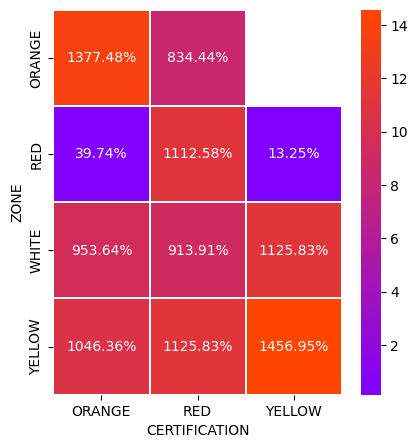

In [209]:
heatmap_data = state_seen_df.pivot(index='ZONE', columns='CERTIFICATION', values='colonna_percentuale')

fig, ax = plt.subplots(1, 1, figsize = (5, 5))

cmap_custom = LinearSegmentedColormap.from_list('custom', [purple, orange])

sns.heatmap(heatmap_data,
            linewidth = 0.3,
            annot=True,
            cmap=cmap_custom,
            cbar = True,
            fmt='1.02%',
            square=True)

plt.show()